# Simon & Garfunkel Lyric Generator

This notebook contains code for an MLP neural network that generates lyrics from the American rock due Simon & Garfunkel. Generation is done on a word-level basis. Lyrics are taken from lyrics.txt.

### Import Libraries

In [1]:
import re
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import nltk
from tqdm import tqdm
import torch.optim as optim
from nltk.tokenize import regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Irish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Irish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Input

In [2]:
# Read input
filename = "lyrics.txt"
f = open(filename, 'r')

raw_text = f.read()
raw_text[:1000]

"I was twenty-one years when I wrote this song\nI'm twenty-two now, but I won't be for long\nTime hurries on\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\nOnce my heart was filled with love of a girl\nI held her close, but she faded in the night\nLike a poem I meant to write\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\nI threw a pebble in a brook\nAnd watched the ripples run away\nAnd they never made a sound\nAnd the leaves that are green turn to brown\nAnd they wither with the wind\nAnd they crumble in your hand\nHello, Hello, Hello, Hello\nGood-bye, Good-bye\nGood-bye, Good-bye\nThat's all there is\nAnd the leaves that are green turn to brown\nHello, darkness, my old friend\nI've come to talk with you again\nBecause a vision softly creeping\nLeft its seeds while I was sleeping\nAnd the vision that was planted in my brain\nStill remains\nWithin the sound of sile

In [3]:
# Remove all non-ASCII characters
processed_text = re.sub(r'[^\x00-\x7f]', r'', raw_text).lower()
processed_text[:1000]

"i was twenty-one years when i wrote this song\ni'm twenty-two now, but i won't be for long\ntime hurries on\nand the leaves that are green turn to brown\nand they wither with the wind\nand they crumble in your hand\nonce my heart was filled with love of a girl\ni held her close, but she faded in the night\nlike a poem i meant to write\nand the leaves that are green turn to brown\nand they wither with the wind\nand they crumble in your hand\ni threw a pebble in a brook\nand watched the ripples run away\nand they never made a sound\nand the leaves that are green turn to brown\nand they wither with the wind\nand they crumble in your hand\nhello, hello, hello, hello\ngood-bye, good-bye\ngood-bye, good-bye\nthat's all there is\nand the leaves that are green turn to brown\nhello, darkness, my old friend\ni've come to talk with you again\nbecause a vision softly creeping\nleft its seeds while i was sleeping\nand the vision that was planted in my brain\nstill remains\nwithin the sound of sile

In [4]:
# Get word tokens from lyrics
word_tokens = regexp_tokenize(processed_text, pattern=r'\s|[\.,;"]', gaps=True)
print(f"Number of word tokens: {len(word_tokens)}")

Number of word tokens: 1996


In [5]:
# Get unique word tokens from word tokens
unique_words = sorted(list(set(word_tokens)))
print(f"Number of unique word tokens: {len(unique_words)}")

Number of unique word tokens: 624


In [6]:
# Create vocabulary of word tokens
word_vocabulary = unique_words
word_vocabulary

["'cause",
 "'neath",
 'a',
 'aberdeen',
 'again',
 'age',
 'ah',
 "ain't",
 'all',
 'alleyway',
 'almost',
 'alone',
 'always',
 'am',
 'an',
 'and',
 'april',
 'are',
 'armor',
 'arms',
 'around',
 'arunning',
 'as',
 'asleep',
 'at',
 'august',
 'autumn',
 'away',
 'away?',
 'baby',
 'back',
 'bad',
 'badly',
 'band',
 "banker's",
 'be',
 'because',
 'before',
 'beliefs',
 'believe',
 'belongs',
 'below',
 'belton',
 'beside',
 'beyond',
 'blessed',
 'blood',
 'blot',
 'blow',
 'books',
 'born',
 'bound',
 'bowed',
 'brain',
 'breathing',
 'broken',
 'brook',
 'brother',
 'brown',
 'built',
 'bullet',
 'but',
 'by',
 'can',
 "can't",
 'cancer',
 'care',
 'catch',
 'causes',
 'change',
 'changes',
 "changin'",
 'charity',
 'cheap',
 'child',
 'chilly',
 'church',
 'cigarettes',
 'close',
 'closed',
 'cobblestone',
 'cold',
 'collar',
 'come',
 'comfort',
 'committed',
 'common',
 'connections',
 'continuing',
 'cory',
 'could',
 "couldn't",
 'creep',
 'creeping',
 'cried',
 'cries',


In [7]:
# Create index-word mappings 
indices_words = dict((index, word) for index, word in enumerate(unique_words))
indices_words

{0: "'cause",
 1: "'neath",
 2: 'a',
 3: 'aberdeen',
 4: 'again',
 5: 'age',
 6: 'ah',
 7: "ain't",
 8: 'all',
 9: 'alleyway',
 10: 'almost',
 11: 'alone',
 12: 'always',
 13: 'am',
 14: 'an',
 15: 'and',
 16: 'april',
 17: 'are',
 18: 'armor',
 19: 'arms',
 20: 'around',
 21: 'arunning',
 22: 'as',
 23: 'asleep',
 24: 'at',
 25: 'august',
 26: 'autumn',
 27: 'away',
 28: 'away?',
 29: 'baby',
 30: 'back',
 31: 'bad',
 32: 'badly',
 33: 'band',
 34: "banker's",
 35: 'be',
 36: 'because',
 37: 'before',
 38: 'beliefs',
 39: 'believe',
 40: 'belongs',
 41: 'below',
 42: 'belton',
 43: 'beside',
 44: 'beyond',
 45: 'blessed',
 46: 'blood',
 47: 'blot',
 48: 'blow',
 49: 'books',
 50: 'born',
 51: 'bound',
 52: 'bowed',
 53: 'brain',
 54: 'breathing',
 55: 'broken',
 56: 'brook',
 57: 'brother',
 58: 'brown',
 59: 'built',
 60: 'bullet',
 61: 'but',
 62: 'by',
 63: 'can',
 64: "can't",
 65: 'cancer',
 66: 'care',
 67: 'catch',
 68: 'causes',
 69: 'change',
 70: 'changes',
 71: "changin'",


In [8]:
# Create word-index mappings
word_indices = dict((word, index) for index, word in enumerate(unique_words))
word_indices

{"'cause": 0,
 "'neath": 1,
 'a': 2,
 'aberdeen': 3,
 'again': 4,
 'age': 5,
 'ah': 6,
 "ain't": 7,
 'all': 8,
 'alleyway': 9,
 'almost': 10,
 'alone': 11,
 'always': 12,
 'am': 13,
 'an': 14,
 'and': 15,
 'april': 16,
 'are': 17,
 'armor': 18,
 'arms': 19,
 'around': 20,
 'arunning': 21,
 'as': 22,
 'asleep': 23,
 'at': 24,
 'august': 25,
 'autumn': 26,
 'away': 27,
 'away?': 28,
 'baby': 29,
 'back': 30,
 'bad': 31,
 'badly': 32,
 'band': 33,
 "banker's": 34,
 'be': 35,
 'because': 36,
 'before': 37,
 'beliefs': 38,
 'believe': 39,
 'belongs': 40,
 'below': 41,
 'belton': 42,
 'beside': 43,
 'beyond': 44,
 'blessed': 45,
 'blood': 46,
 'blot': 47,
 'blow': 48,
 'books': 49,
 'born': 50,
 'bound': 51,
 'bowed': 52,
 'brain': 53,
 'breathing': 54,
 'broken': 55,
 'brook': 56,
 'brother': 57,
 'brown': 58,
 'built': 59,
 'bullet': 60,
 'but': 61,
 'by': 62,
 'can': 63,
 "can't": 64,
 'cancer': 65,
 'care': 66,
 'catch': 67,
 'causes': 68,
 'change': 69,
 'changes': 70,
 "changin'": 71,


In [9]:
# Create x (input): Split lyrics into blocks, where each block has the same amount of words
# Create y (targets): For each x input, the y is the word that comes next
# The model should learn to predict y from the input x

block_size = 2
step = 1

x = []
y = []

for i in range(0, len(word_tokens) - block_size, step):
    x.append(word_tokens[i: i+block_size])
    y.append(word_tokens[i + block_size])

In [10]:
# Inspect x
x[0]

['i', 'was']

In [11]:
# Create one-hot encoding of x
x_encoded = []

for x_arr in x:
    x_ints = [word_indices[item] for item in x_arr]
    
    x_row = []
    for item in x_ints:
        x_vector = np.zeros(len(unique_words))
        x_vector[item] = 1
        x_row.append(x_vector)
        
    x_encoded.append(x_row)
    
x_encoded = np.array(x_encoded)
x_encoded[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
# Inspect y
y

['twenty-one',
 'years',
 'when',
 'i',
 'wrote',
 'this',
 'song',
 "i'm",
 'twenty-two',
 'now',
 'but',
 'i',
 "won't",
 'be',
 'for',
 'long',
 'time',
 'hurries',
 'on',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 'and',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 'and',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 'once',
 'my',
 'heart',
 'was',
 'filled',
 'with',
 'love',
 'of',
 'a',
 'girl',
 'i',
 'held',
 'her',
 'close',
 'but',
 'she',
 'faded',
 'in',
 'the',
 'night',
 'like',
 'a',
 'poem',
 'i',
 'meant',
 'to',
 'write',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'turn',
 'to',
 'brown',
 'and',
 'they',
 'wither',
 'with',
 'the',
 'wind',
 'and',
 'they',
 'crumble',
 'in',
 'your',
 'hand',
 'i',
 'threw',
 'a',
 'pebble',
 'in',
 'a',
 'brook',
 'and',
 'watched',
 'the',
 'ripples',
 'run',
 'away',
 'and',
 'they',
 'never',
 'made',
 'a',
 'sound',
 'and',
 'the',
 'leaves',
 'that',
 'are',
 'green',
 'tu

In [13]:
# Convert each word in y into their corresponding indices
y_ints = [word_indices[item] for item in y]
y_ints

[552,
 620,
 584,
 240,
 618,
 525,
 472,
 242,
 553,
 338,
 61,
 240,
 606,
 35,
 165,
 280,
 535,
 239,
 344,
 15,
 518,
 269,
 516,
 17,
 198,
 550,
 537,
 58,
 15,
 523,
 602,
 601,
 518,
 594,
 15,
 523,
 97,
 246,
 623,
 208,
 345,
 320,
 223,
 570,
 153,
 601,
 284,
 341,
 2,
 183,
 240,
 224,
 226,
 78,
 61,
 446,
 146,
 246,
 518,
 332,
 275,
 2,
 378,
 240,
 299,
 537,
 614,
 15,
 518,
 269,
 516,
 17,
 198,
 550,
 537,
 58,
 15,
 523,
 602,
 601,
 518,
 594,
 15,
 523,
 97,
 246,
 623,
 208,
 240,
 531,
 2,
 366,
 246,
 2,
 56,
 15,
 573,
 518,
 415,
 424,
 27,
 15,
 523,
 328,
 287,
 2,
 476,
 15,
 518,
 269,
 516,
 17,
 198,
 550,
 537,
 58,
 15,
 523,
 602,
 601,
 518,
 594,
 15,
 523,
 97,
 246,
 623,
 208,
 225,
 225,
 225,
 225,
 194,
 194,
 194,
 194,
 517,
 8,
 521,
 250,
 15,
 518,
 269,
 516,
 17,
 198,
 550,
 537,
 58,
 225,
 103,
 320,
 343,
 171,
 243,
 83,
 537,
 507,
 601,
 621,
 4,
 36,
 2,
 560,
 467,
 93,
 270,
 254,
 436,
 587,
 240,
 570,
 461,
 15,
 518,

In [14]:
# Create one-hot encoding of y
y_encoded = []

for item in y_ints:
    y_vector = np.zeros(len(unique_words))
    y_vector[item] = 1
    y_encoded.append(y_vector)

y_encoded = np.array(y_encoded)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
class LyricGenerator(nn.Module):
    def __init__(self, input_dim, output_dim, block_size):
        super().__init__()

        self.embeddings = nn.Linear(input_dim, 50 * 2)
        self.hidden = nn.Linear(50 * 2, 200)
        self.output = nn.Linear(200, output_dim)
        
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.embeddings(x))
        x = self.tanh(self.hidden(x))
        x = self.softmax(self.output(x))

        return x

In [16]:
# Get size of input for training the model
input_size = x_encoded[0].ravel().shape[0]
input_size

1248

In [17]:
# Instantiate model
model = LyricGenerator(input_size, len(unique_words), block_size)

# Print model configuration
model

LyricGenerator(
  (embeddings): Linear(in_features=1248, out_features=100, bias=True)
  (hidden): Linear(in_features=100, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=624, bias=True)
  (tanh): Tanh()
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [18]:
# Create custom Dataset class
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
        self.n_samples = len(x)
    
    def __getitem__(self, index):
        return self.x[index].ravel(), self.y[index]
    
    def __len__(self):
        return self.n_samples

In [19]:
# Create x and y PyTorch tensors
device = 'cpu'
x = torch.tensor(x_encoded).float().to(device)
y = torch.tensor(y_encoded).float().to(device)

In [20]:
# Create training dataset using custom Dataset class
training_ds = CustomDataset(x, y)

In [21]:
# Load training dataset into DataLoader
from torch.utils.data import DataLoader

batch_size = 5

train_loader = DataLoader(
    training_ds,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [22]:
# Define model optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [23]:
# Define function to train model
def train_fn(loader, model, optimizer, loss_fn, device):
    loop = tqdm(loader)

    ave_loss = 0
    count = 0 
    for batch_idx, (data, targets) in enumerate(loop):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        # Forward
        predictions = model.forward(data)
        loss = loss_fn(predictions, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Update tqdm loading bar
        loop.set_postfix(loss=loss.item())

        count += 1
        ave_loss += loss.item()
    
    ave_loss = ave_loss / count

    return ave_loss

In [24]:
def generate_text(model, seed_text, num_words):
    device = 'cpu'
    model.eval()
    
    # Convert seed_text to input tensor
    seed_encoded = []
    for word in seed_text.split():
        word_index = word_indices[word]
        word_encoded = np.zeros(len(unique_words))
        word_encoded[word_index] = 1
        seed_encoded.append(word_encoded)
    seed_encoded = np.array(seed_encoded)
    seed_encoded = np.expand_dims(seed_encoded, axis=0)
    seed_tensor = torch.tensor(seed_encoded).float().to(device)

    # Generate text
    generated_text = seed_text
    for i in range(num_words):
        predictions = model(seed_tensor)
        predicted_index = torch.argmax(predictions, dim=1).item()
        predicted_word = indices_words[predicted_index]
        generated_text += ' ' + predicted_word
        
        # Update seed tensor with predicted word
        predicted_encoded = np.zeros(len(unique_words))
        predicted_encoded[predicted_index] = 1
        predicted_encoded = np.expand_dims(predicted_encoded, axis=0)
        seed_tensor = torch.cat((seed_tensor[:, 1:, :], torch.tensor(predicted_encoded).float().to(device)), axis=1)

    return generated_text

In [36]:
# Train model
epochs = 100
average_losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    ave_loss = train_fn(train_loader, model, optimizer, criterion, device)
    
    print("Ave Loss: {}".format(ave_loss))
    average_losses.append(ave_loss)

Epoch: 0


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 179.04it/s, loss=6.44]


Ave Loss: 6.303208349940173
Epoch: 1


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 174.71it/s, loss=6.44]


Ave Loss: 6.303191395331743
Epoch: 2


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 188.42it/s, loss=6.44]


Ave Loss: 6.303177167897236
Epoch: 3


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 177.65it/s, loss=6.44]


Ave Loss: 6.303165771608663
Epoch: 4


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 168.16it/s, loss=6.44]


Ave Loss: 6.303156069944377
Epoch: 5


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 166.78it/s, loss=6.44]


Ave Loss: 6.303147743817858
Epoch: 6


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 181.43it/s, loss=6.44]


Ave Loss: 6.303140815935637
Epoch: 7


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 171.47it/s, loss=6.44]


Ave Loss: 6.303135600603912
Epoch: 8


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 165.46it/s, loss=6.44]


Ave Loss: 6.303130400808234
Epoch: 9


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 153.57it/s, loss=6.44]


Ave Loss: 6.303126281365416
Epoch: 10


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 151.58it/s, loss=6.44]


Ave Loss: 6.3031223662813805
Epoch: 11


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 138.54it/s, loss=6.44]


Ave Loss: 6.303119372604485
Epoch: 12


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 136.69it/s, loss=6.44]


Ave Loss: 6.303116457802909
Epoch: 13


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:03<00:00, 127.31it/s, loss=6.44]


Ave Loss: 6.303114556429679
Epoch: 14


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:03<00:00, 113.76it/s, loss=6.44]


Ave Loss: 6.303111344053034
Epoch: 15


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:03<00:00, 118.09it/s, loss=6.44]


Ave Loss: 6.303107942853655
Epoch: 16


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:03<00:00, 124.50it/s, loss=6.44]


Ave Loss: 6.303107047738288
Epoch: 17


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 143.88it/s, loss=6.44]


Ave Loss: 6.303106768089428
Epoch: 18


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 140.08it/s, loss=6.44]


Ave Loss: 6.303103596345524
Epoch: 19


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 159.16it/s, loss=6.44]


Ave Loss: 6.303102458628795
Epoch: 20


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 166.96it/s, loss=6.44]


Ave Loss: 6.303101255182634
Epoch: 21


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 167.77it/s, loss=6.44]


Ave Loss: 6.30309986410882
Epoch: 22


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 159.72it/s, loss=6.44]


Ave Loss: 6.3030956155972975
Epoch: 23


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 187.52it/s, loss=6.44]


Ave Loss: 6.303094154013727
Epoch: 24


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 196.06it/s, loss=6.44]


Ave Loss: 6.303092356612509
Epoch: 25


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 192.85it/s, loss=6.44]


Ave Loss: 6.303091665855924
Epoch: 26


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 192.53it/s, loss=6.44]


Ave Loss: 6.303089768067936
Epoch: 27


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 192.44it/s, loss=6.44]


Ave Loss: 6.303089208770216
Epoch: 28


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 190.04it/s, loss=6.44]


Ave Loss: 6.303092411586216
Epoch: 29


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 191.91it/s, loss=6.44]


Ave Loss: 6.3031014009824675
Epoch: 30


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 185.30it/s, loss=6.44]


Ave Loss: 6.303103590370121
Epoch: 31


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 183.13it/s, loss=6.44]


Ave Loss: 6.303095612012055
Epoch: 32


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 180.14it/s, loss=6.44]


Ave Loss: 6.303087664726085
Epoch: 33


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.52it/s, loss=6.44]


Ave Loss: 6.3030843316463
Epoch: 34


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 180.46it/s, loss=6.44]


Ave Loss: 6.30308365045036
Epoch: 35


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 172.33it/s, loss=6.44]


Ave Loss: 6.30308395161067
Epoch: 36


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 176.45it/s, loss=6.44]


Ave Loss: 6.303085037938933
Epoch: 37


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 170.73it/s, loss=6.44]


Ave Loss: 6.303089962866073
Epoch: 38


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 176.75it/s, loss=6.44]


Ave Loss: 6.3031030693149805
Epoch: 39


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 179.68it/s, loss=6.44]


Ave Loss: 6.303102098909536
Epoch: 40


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 170.14it/s, loss=6.44]


Ave Loss: 6.303094973839016
Epoch: 41


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 171.95it/s, loss=6.44]


Ave Loss: 6.303087312177309
Epoch: 42


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 176.14it/s, loss=6.44]


Ave Loss: 6.303084059167924
Epoch: 43


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 192.84it/s, loss=6.44]


Ave Loss: 6.303082570097501
Epoch: 44


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:01<00:00, 201.28it/s, loss=6.44]


Ave Loss: 6.303082539025405
Epoch: 45


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 195.73it/s, loss=6.44]


Ave Loss: 6.303086280822754
Epoch: 46


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 195.51it/s, loss=6.44]


Ave Loss: 6.303093696297858
Epoch: 47


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 195.62it/s, loss=6.44]


Ave Loss: 6.3030944336625865
Epoch: 48


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 198.26it/s, loss=6.44]


Ave Loss: 6.30308863513153
Epoch: 49


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 190.58it/s, loss=6.44]


Ave Loss: 6.303084835970312
Epoch: 50


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 190.41it/s, loss=6.44]


Ave Loss: 6.303084521664115
Epoch: 51


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 171.62it/s, loss=6.44]


Ave Loss: 6.303086097975423
Epoch: 52


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 179.98it/s, loss=6.44]


Ave Loss: 6.303087555973751
Epoch: 53


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 182.82it/s, loss=6.44]


Ave Loss: 6.303087281105213
Epoch: 54


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 190.52it/s, loss=6.44]


Ave Loss: 6.303092837034909
Epoch: 55


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 164.80it/s, loss=6.44]


Ave Loss: 6.303096086459052
Epoch: 56


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 173.56it/s, loss=6.44]


Ave Loss: 6.303092342271542
Epoch: 57


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.36it/s, loss=6.44]


Ave Loss: 6.303085610382539
Epoch: 58


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 188.47it/s, loss=6.44]


Ave Loss: 6.30308116707288
Epoch: 59


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 186.08it/s, loss=6.44]


Ave Loss: 6.3030797676335
Epoch: 60


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 183.60it/s, loss=6.44]


Ave Loss: 6.303079609882862
Epoch: 61


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 188.50it/s, loss=6.44]


Ave Loss: 6.303080589848951
Epoch: 62


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 184.24it/s, loss=6.44]


Ave Loss: 6.303079401938837
Epoch: 63


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 185.71it/s, loss=6.44]


Ave Loss: 6.303076721373058
Epoch: 64


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 182.65it/s, loss=6.44]


Ave Loss: 6.303073990613894
Epoch: 65


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.68it/s, loss=6.44]


Ave Loss: 6.303074108926873
Epoch: 66


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 180.21it/s, loss=6.44]


Ave Loss: 6.303076515819196
Epoch: 67


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 173.56it/s, loss=6.44]


Ave Loss: 6.303084226479208
Epoch: 68


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 183.18it/s, loss=6.44]


Ave Loss: 6.303088347117106
Epoch: 69


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.09it/s, loss=6.44]


Ave Loss: 6.303076879123697
Epoch: 70


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 183.64it/s, loss=6.44]


Ave Loss: 6.3030716709624555
Epoch: 71


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 176.02it/s, loss=6.44]


Ave Loss: 6.303070234475578
Epoch: 72


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 182.00it/s, loss=6.44]


Ave Loss: 6.3030714403119
Epoch: 73


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 185.45it/s, loss=6.44]


Ave Loss: 6.303075505976091
Epoch: 74


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 180.35it/s, loss=6.44]


Ave Loss: 6.3030892458177155
Epoch: 75


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 175.13it/s, loss=6.44]


Ave Loss: 6.303092153448808
Epoch: 76


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.86it/s, loss=6.44]


Ave Loss: 6.3030852243715065
Epoch: 77


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.07it/s, loss=6.44]


Ave Loss: 6.30307902548845
Epoch: 78


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 175.95it/s, loss=6.44]


Ave Loss: 6.303074950263614
Epoch: 79


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 186.54it/s, loss=6.44]


Ave Loss: 6.303071929099865
Epoch: 80


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 181.15it/s, loss=6.44]


Ave Loss: 6.303069042980223
Epoch: 81


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 181.85it/s, loss=6.44]


Ave Loss: 6.303066761571363
Epoch: 82


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 183.86it/s, loss=6.44]


Ave Loss: 6.303064517210002
Epoch: 83


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 186.58it/s, loss=6.44]


Ave Loss: 6.3030595779418945
Epoch: 84


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 180.82it/s, loss=6.33]


Ave Loss: 6.302081853823554
Epoch: 85


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.98it/s, loss=6.27]


Ave Loss: 6.299195562090192
Epoch: 86


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 169.44it/s, loss=6.25]


Ave Loss: 6.296840186107128
Epoch: 87


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 176.56it/s, loss=6.26]


Ave Loss: 6.292815385306987
Epoch: 88


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 177.18it/s, loss=6.29]


Ave Loss: 6.2856270065881255
Epoch: 89


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 191.19it/s, loss=6.29]


Ave Loss: 6.283773660062249
Epoch: 90


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 181.41it/s, loss=6.28]


Ave Loss: 6.282400445531783
Epoch: 91


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 180.08it/s, loss=6.27]


Ave Loss: 6.280956340015383
Epoch: 92


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 183.67it/s, loss=6.26]


Ave Loss: 6.279586499197441
Epoch: 93


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 178.56it/s, loss=6.25]


Ave Loss: 6.2782552594827825
Epoch: 94


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 175.83it/s, loss=6.24]


Ave Loss: 6.277053041864457
Epoch: 95


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 167.21it/s, loss=6.23]


Ave Loss: 6.275944408617522
Epoch: 96


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 177.90it/s, loss=6.23]


Ave Loss: 6.274890355896532
Epoch: 97


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 182.12it/s, loss=6.22]


Ave Loss: 6.273884341830299
Epoch: 98


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 184.75it/s, loss=6.22]


Ave Loss: 6.272933673141594
Epoch: 99


100%|████████████████████████████████████████████████████████████████████| 399/399 [00:02<00:00, 179.05it/s, loss=6.21]

Ave Loss: 6.272045388855133


In [37]:
# Create input seed for lyric generation
song = ['hello', 'darkness']
x_ints = [word_indices[item] for item in song]
x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).to(dtype=torch.float32)

output = model(initial_input)[0].detach().cpu().numpy()
output

array([1.49388537e-08, 1.37796530e-08, 7.73004055e-01, 1.33123601e-08,
       1.31064217e-08, 1.25211290e-08, 1.28750521e-08, 1.31549580e-08,
       1.59082134e-08, 1.27128992e-08, 1.18128280e-08, 1.45524934e-08,
       1.34257299e-08, 2.93425639e-08, 1.94452525e-08, 1.03107311e-01,
       1.29718245e-08, 2.99708702e-08, 1.58702704e-08, 1.38143363e-08,
       1.47435362e-08, 1.41484637e-08, 1.40639802e-08, 1.46158605e-08,
       1.37643124e-08, 1.24766917e-08, 1.33183029e-08, 1.44795376e-08,
       1.75809980e-08, 1.86671034e-08, 1.28969262e-08, 1.28438531e-08,
       1.32151134e-08, 1.41173828e-08, 1.35411495e-08, 1.90693754e-07,
       1.39822953e-08, 1.29626745e-08, 1.32871714e-08, 1.36169325e-08,
       1.31716540e-08, 1.22031141e-08, 1.28995827e-08, 1.33873232e-08,
       1.29833113e-08, 1.62686700e-08, 1.34035210e-08, 1.22562973e-08,
       1.32139535e-08, 1.29014035e-08, 1.60071014e-08, 1.62122618e-08,
       1.22681323e-08, 1.28048629e-08, 1.29708857e-08, 1.28849278e-08,
      

<BarContainer object of 624 artists>

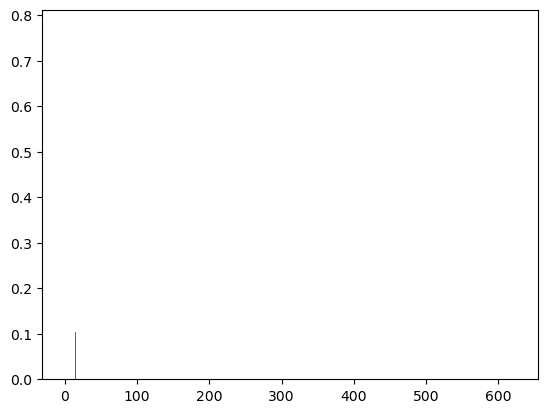

In [38]:
# Inspect probability distribution of word tokens
import matplotlib.pyplot as plt

plt.bar(range(len(output)), output)

In [39]:
index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word1 = indices_words[index]
word1

ValueError: sum(pvals[:-1].astype(np.float64)) > 1.0. The pvals array is cast to 64-bit floating point prior to checking the sum. Precision changes when casting may cause problems even if the sum of the original pvals is valid.

In [ ]:
song.append(word1)

In [ ]:
phrase = ['darkness', word1]

x_ints = [word_indices[item] for item in phrase]

x_vector = []

for item in x_ints:
    x_item = np.zeros(len(unique_words))
    x_item[item] = 1
    
    x_vector.append(x_item)

initial_input = torch.tensor([np.array([x_vector]).ravel()]).float()

output = model(initial_input)[0].detach().cpu().numpy()

index = np.where(np.random.multinomial(1, output) == 1)[0][0]

word2 = indices_words[index]

word2

In [ ]:
song.append(word2)
song